# Seeing What Convolution Neural (ConvNet) Network (CNN) Learns After Training

In [17]:
# References important modules

from tensorflow.keras import models
from tensorflow.keras.preprocessing import image

import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loads a ConvNet that was built from scratch and trained with dropout and data augmentation

model = models.load_model("dogs_vs._cats_prediction_model_with_dropout_and_data_augmentation.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# Checks summary for loaded model

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

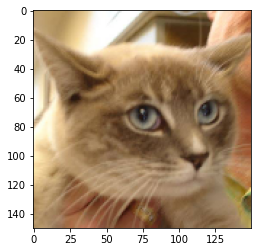

In [25]:
# Considers one test image to test the model to receive model's activations across layers
# But, first check how test image looks like

image_path = os.path.join(os.getcwd(), "Data", "test", "cats", "cat.1512.jpg")

test_image = image.load_img(image_path, target_size = (150, 150))

test_image_tensor = image.img_to_array(test_image)

test_image_tensor /= 255.  # as pyplot.imshow method accepts tensor values in the range 0 and 1

plt.imshow(test_image_tensor)

plt.show()

In [30]:
# Prepares list of outputs for the first 8 convolutional layers

layer_outputs = [layer.output for layer in model.layers[:8]]


# Createa a wrapper model out of these input and output convolutional layers

activation_model = models.Model(inputs=model.input, outputs = layer_outputs)

In [31]:
# Expands dimension of input from 3 to 4 for compatibility with model for its prediction

test_image_tensor = np.expand_dims(test_image_tensor, axis = 0)

# Performs prediction to get activation across layers

activations = activation_model.predict(test_image_tensor)

In [47]:
# Gets first ConvNet's activation across channel (or filters)

first_layer_activation = activations[0]

# Checks shape

first_layer_activation.shape

(1, 148, 148, 32)

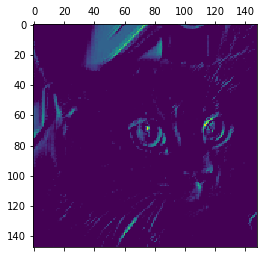

In [48]:
# Plots the activation matrix of the first channel (index 0)

plt.matshow(first_layer_activation[0, :, :, 0], cmap = "viridis")

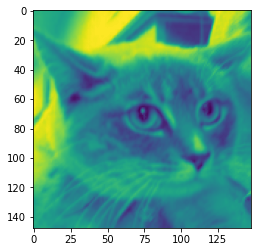

In [51]:
# Plots the activation matrix of the second channel (index 1)

plt.imshow(fist_layer_activation[0, :, :, 1])

In [58]:
activations[0].shape

(1, 148, 148, 32)

/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


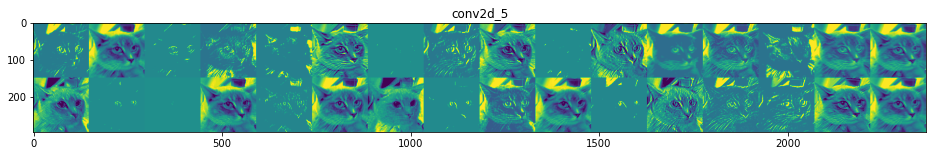

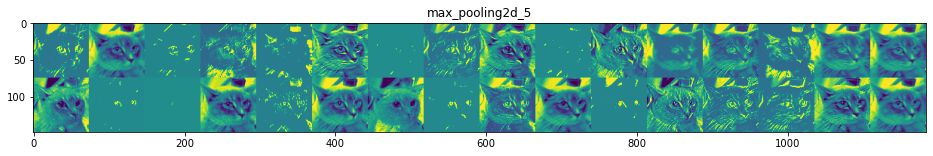

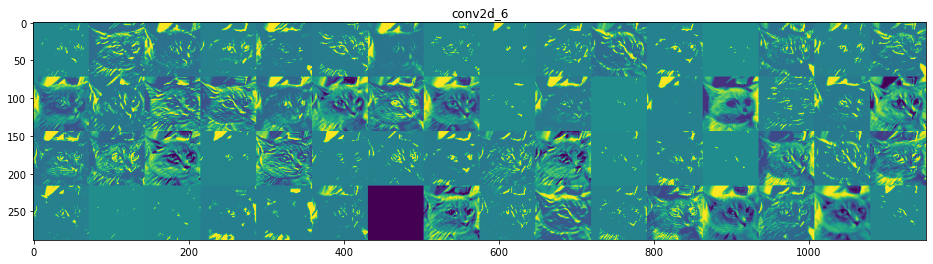

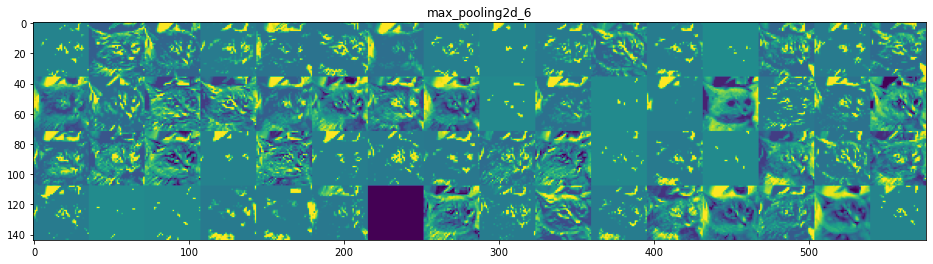

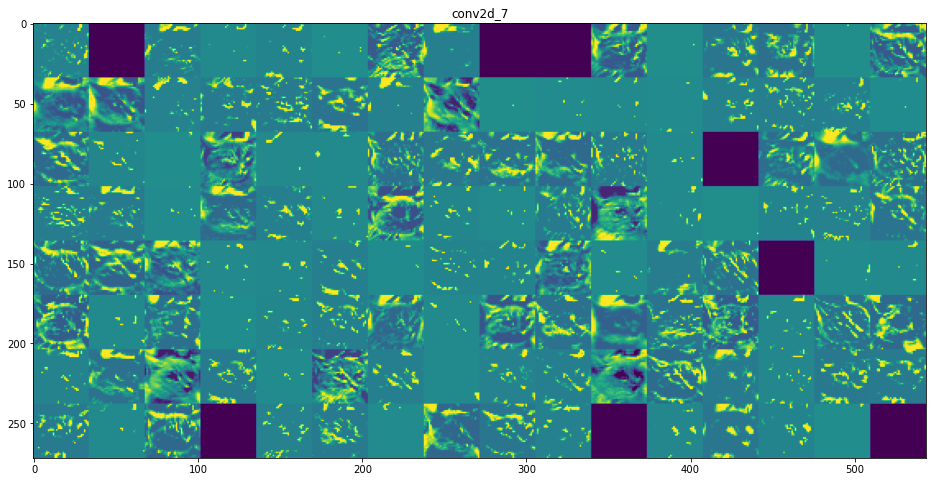

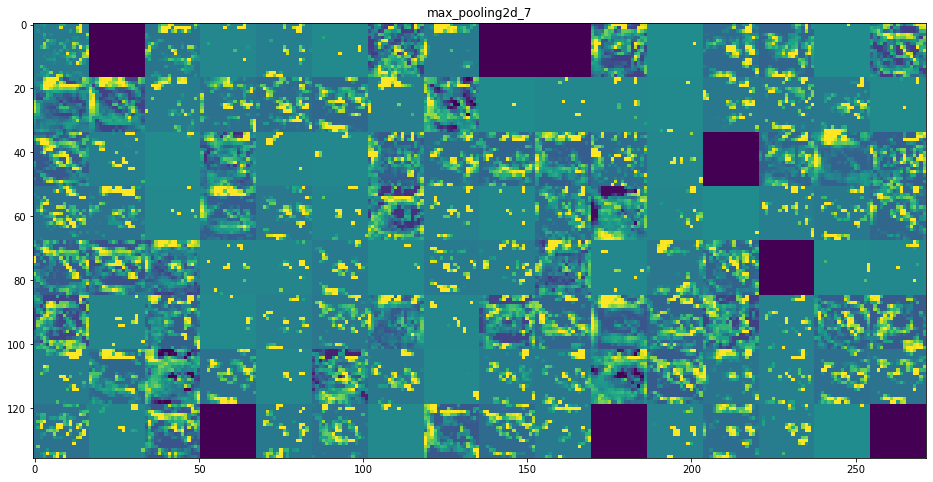

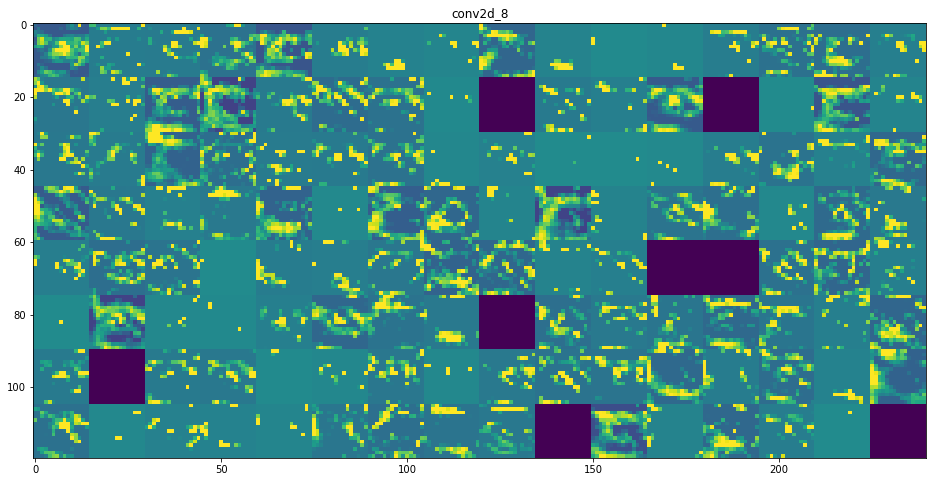

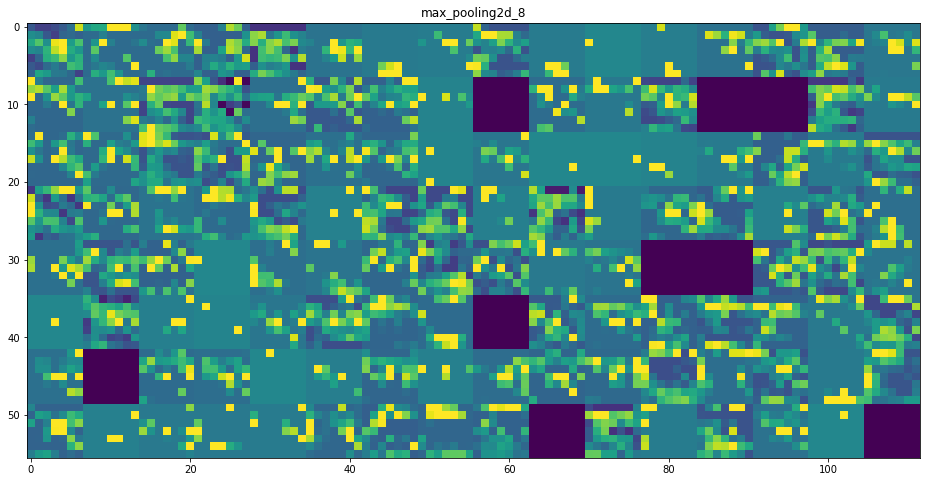

In [60]:
# Now, let's plot all activation across channels and layers in a grid manner


# Stores names of all layers in a list for plot to show
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
# Restricts number of images per row to 16

images_per_row = 16

# Loops over activations layers and prepares image grids to show in plot

for layer_name, layer_activation in zip(layer_names, activations):
    features_count = layer_activation.shape[-1]
    column_count = features_count // images_per_row
    image_size = layer_activation.shape[1]
    
    display_grid = np.zeros((image_size * column_count, image_size * images_per_row))
    
    for col in range(column_count):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[col * image_size : (col + 1) * image_size,
                        row * image_size : (row + 1) * image_size] = channel_image
            
    scale = 1./image_size
    plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = "auto", cmap = "viridis")